In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.metrics import mean_squared_error
import xgboost as xgb
plt.style.use("fivethirtyeight")

In [228]:
df=pd.read_csv("PJME_hourly.csv")

In [229]:
df=df.set_index("Datetime")

In [230]:
df

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


In [233]:
df.index=pd.to_datetime(df.index)

<AxesSubplot:title={'center':'PJME Energy Consumtion'}, xlabel='Datetime'>

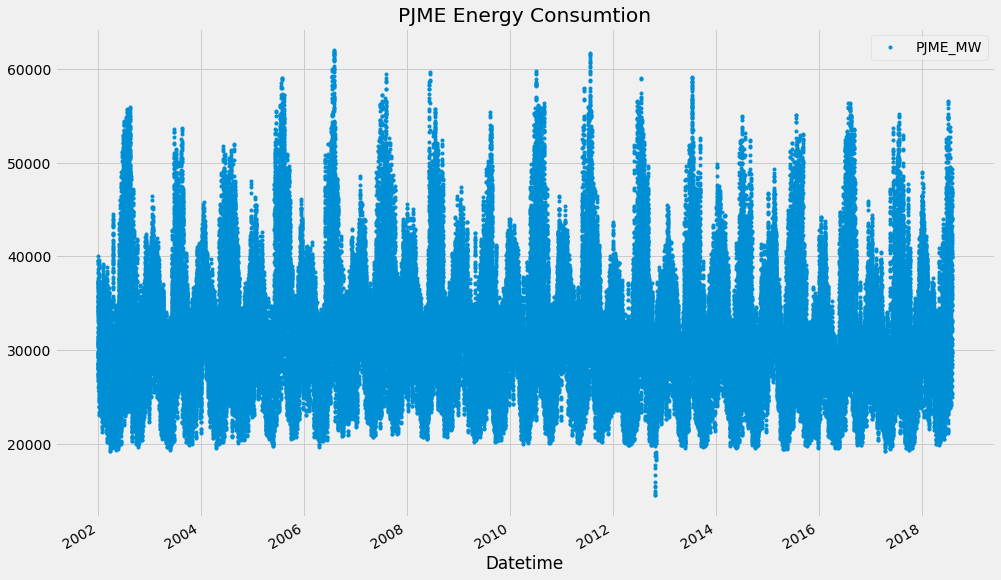

In [234]:
df.plot(style='.',figsize=(15,10),title='PJME Energy Consumtion')

## Outlier Detection

In [248]:
df["year"]=df.index.year

<AxesSubplot:title={'center':'outliers'}, xlabel='Datetime'>

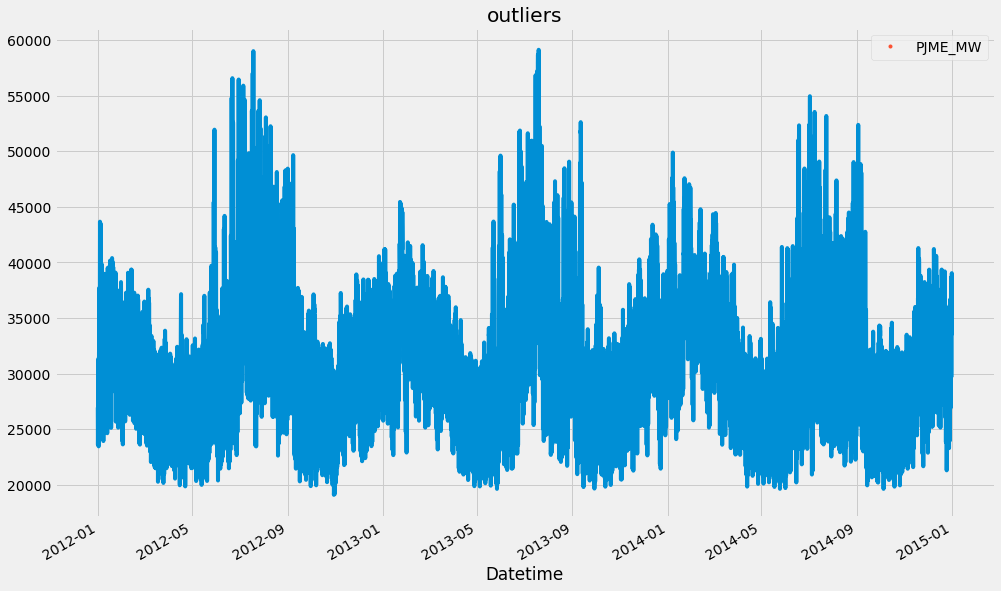

In [240]:
df['PJME_MW'][(df["year"]>=2012) & (df["year"]<=2014)].plot(style='-',figsize=(15,10),title="outliers")
df['PJME_MW'][(df["year"]>=2012) & (df["year"]<=2014) & (df["PJME_MW"] <19000)].plot(style='.',figsize=(15,10),legend='out')


<AxesSubplot:title={'center':'Detiled Anlysis of outlier'}, xlabel='Datetime'>

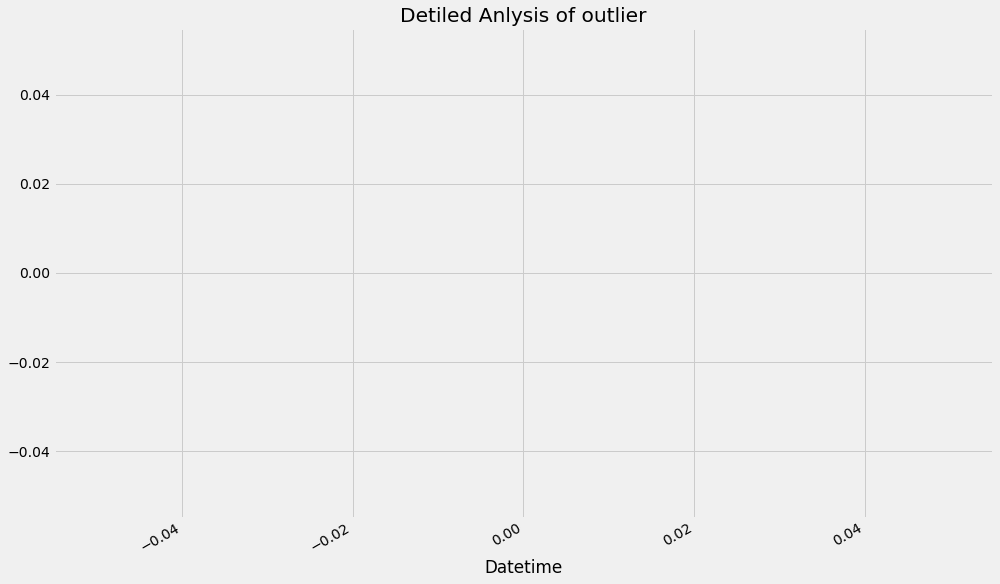

In [249]:
df['PJME_MW'][(df["year"]>=2012) & (df["year"]<=2013) & (df["PJME_MW"] <19000)].plot(style='-',figsize=(15,10),title='Detiled Anlysis of outlier')

In [250]:
# Removimg the Outliers

df=df.query("PJME_MW >19_000").copy()

In [251]:
df=df.drop(columns="year")


### Train Test Split

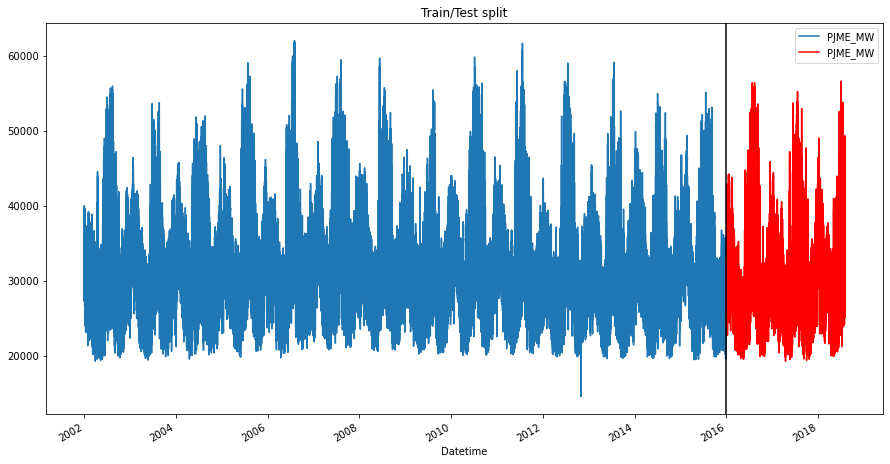

In [191]:
train=df.loc[df.index < '01-01-2016']
test=df.loc[df.index >= '01-01-2016']

fig ,ax=plt.subplots(figsize=(15,8))
train.plot(ax=ax,label="Training set",title='Train/Test split')
test.plot(ax=ax,label="Test set",color="red")
ax.axvline('01-01-2016',color='black',ls='-')

<AxesSubplot:xlabel='Datetime'>

<Figure size 1440x576 with 0 Axes>

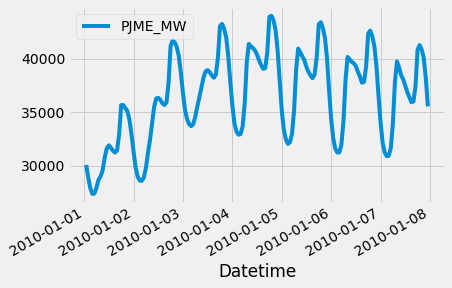

In [245]:
plt.figure(figsize=(20,8))
df.iloc[(df.index > " 01-01-2010") & (df.index < '01-08-2010')].plot()

## Time Series Cross Validation

In [246]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:

TimeSeriesSplit()

In [193]:
def create_feature(df):
    '''
    Create time Series Based Features
    
    '''
    df["hours"]=df.index.hour
    df["dayofweek"]=df.index.dayofweek
    df["quater"]=df.index.quarter
    df["month"]=df.index.month
    df["year"]=df.index.year
    df['dayofyear']=df.index.dayofyear
    return df

In [194]:
df=create_feature(df)

In [195]:
df

,PJME_MW,hours,dayofweek,quater,month,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1


Text(0.5, 1.0, 'Energy consumtion by Hours in MW')

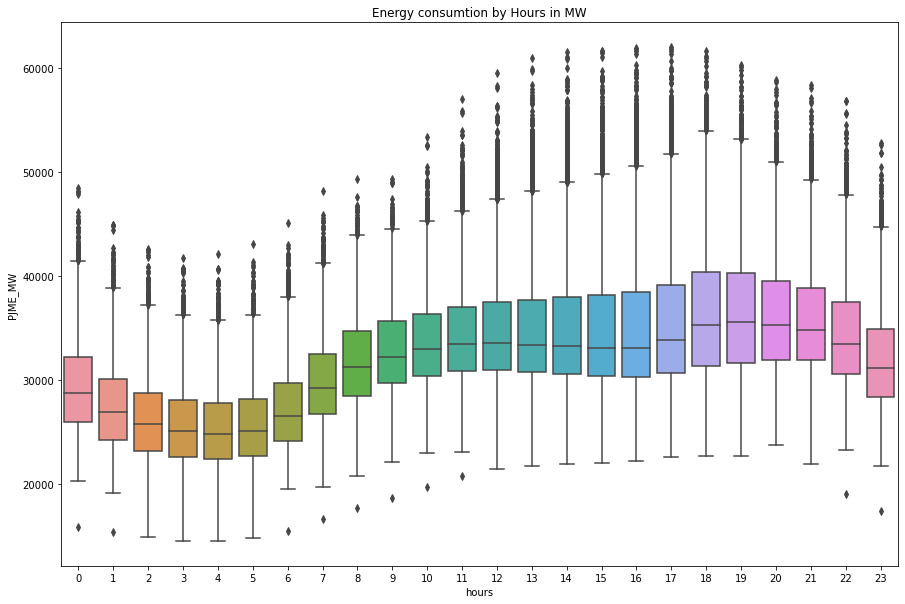

In [196]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='hours',y='PJME_MW')
plt.title("Energy consumtion by Hours in MW")


Text(0.5, 1.0, 'Energy consumtion by Hours in MW')

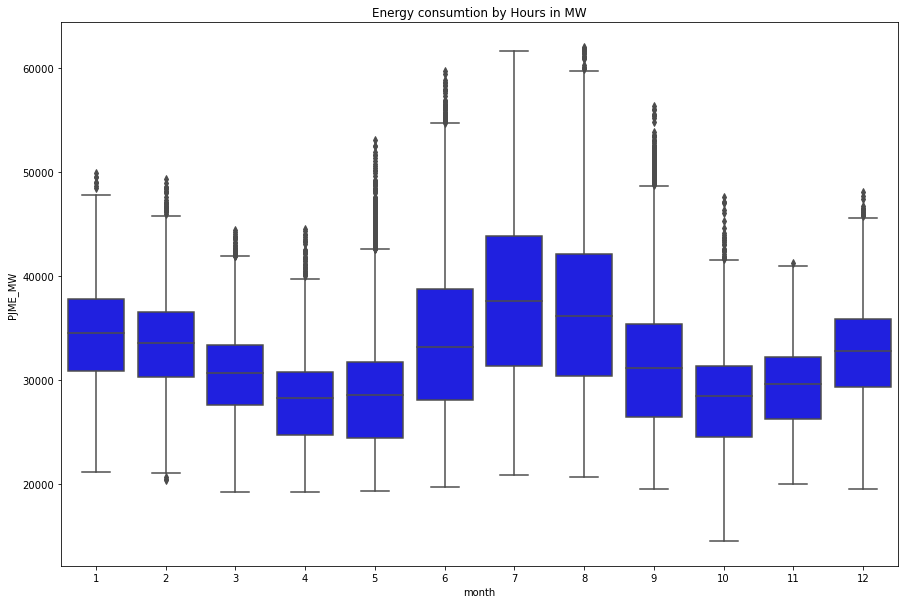

In [197]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='month',y='PJME_MW',color='Blue')
plt.title("Energy consumtion by Hours in MW")

Text(0.5, 1.0, 'Energy consumtion by Hours in MW')

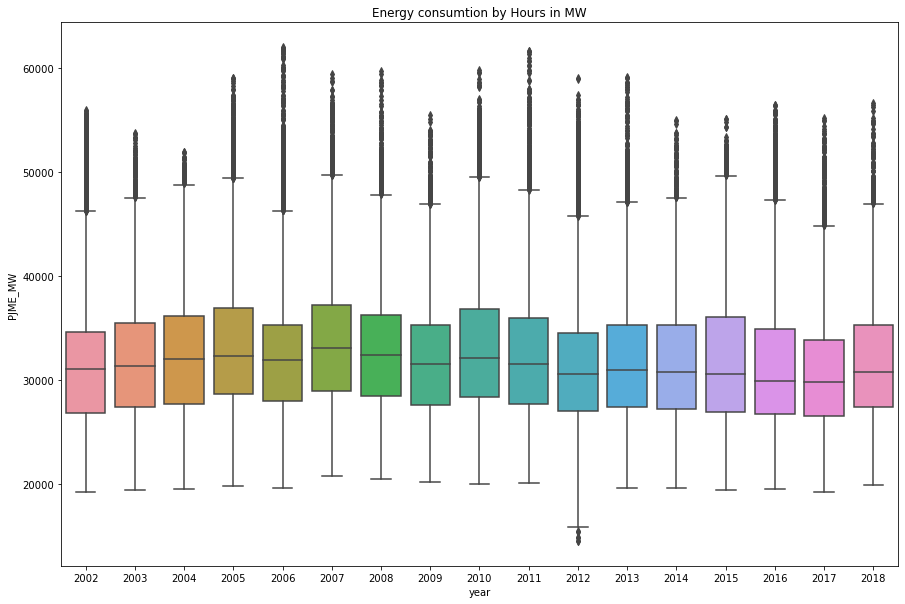

In [198]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='year',y='PJME_MW',)
plt.title("Energy consumtion by Hours in MW")

### Creating the Model

In [199]:
train=create_feature(train)
train

C:\Users\skidrow_pc\AppData\Local\Temp\ipykernel_3228\3346639895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hours"]=df.index.hour
C:\Users\skidrow_pc\AppData\Local\Temp\ipykernel_3228\3346639895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dayofweek"]=df.index.dayofweek
C:\Users\skidrow_pc\AppData\Local\Temp\ipykernel_3228\3346639895.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,PJME_MW,hours,dayofweek,quater,month,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365
...,...,...,...,...,...,...,...
2015-01-01 20:00:00,34832.0,20,3,1,1,2015,1
2015-01-01 21:00:00,34302.0,21,3,1,1,2015,1
2015-01-01 22:00:00,33227.0,22,3,1,1,2015,1


In [200]:
test=create_feature(test)
test

C:\Users\skidrow_pc\AppData\Local\Temp\ipykernel_3228\3346639895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hours"]=df.index.hour
C:\Users\skidrow_pc\AppData\Local\Temp\ipykernel_3228\3346639895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dayofweek"]=df.index.dayofweek
C:\Users\skidrow_pc\AppData\Local\Temp\ipykernel_3228\3346639895.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,PJME_MW,hours,dayofweek,quater,month,year,dayofyear
Datetime,,,,,,,
2016-01-01 00:00:00,26686.0,0,4,1,1,2016,1
2016-12-31 01:00:00,29627.0,1,5,4,12,2016,366
2016-12-31 02:00:00,28744.0,2,5,4,12,2016,366
2016-12-31 03:00:00,28274.0,3,5,4,12,2016,366
2016-12-31 04:00:00,28162.0,4,5,4,12,2016,366
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1


In [201]:
print(df.columns)
feature=[ 'hours', 'dayofweek', 'quater', 'month', 'year','dayofyear']
target="PJME_MW"

X_train=train[feature]
y_train=train[target]

X_test=test[feature]
y_test=test[target]


Index(['PJME_MW', 'hours', 'dayofweek', 'quater', 'month', 'year',
       'dayofyear'],
      dtype='object')


In [202]:
reg=xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50,learning_rate=0.01)

In [203]:
reg.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],verbose=100)

[0]	validation_0-rmse:32564.07595	validation_1-rmse:31495.57472
[100]	validation_0-rmse:12333.27011	validation_1-rmse:11401.04560
[200]	validation_0-rmse:5378.37344	validation_1-rmse:5118.02066
[300]	validation_0-rmse:3394.89195	validation_1-rmse:3936.28336
[394]	validation_0-rmse:2931.16604	validation_1-rmse:3911.80578


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<AxesSubplot:title={'center':'Feature Importance'}>

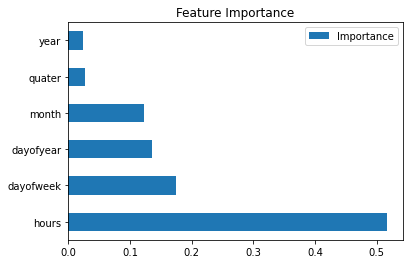

In [204]:
# Featyre Importance0
pd.DataFrame(data=reg.feature_importances_,index=X_train.columns,columns=['Importance']).sort_values(by='Importance',ascending=False).plot(kind='barh', title='Feature Importance')

In [205]:
test['Prediction']=reg.predict(X_test)

C:\Users\skidrow_pc\AppData\Local\Temp\ipykernel_3228\1315120068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction']=reg.predict(X_test)


In [207]:
df=df.merge(test['Prediction'],how="left",left_index=True,right_index=True)

<AxesSubplot:xlabel='Datetime'>

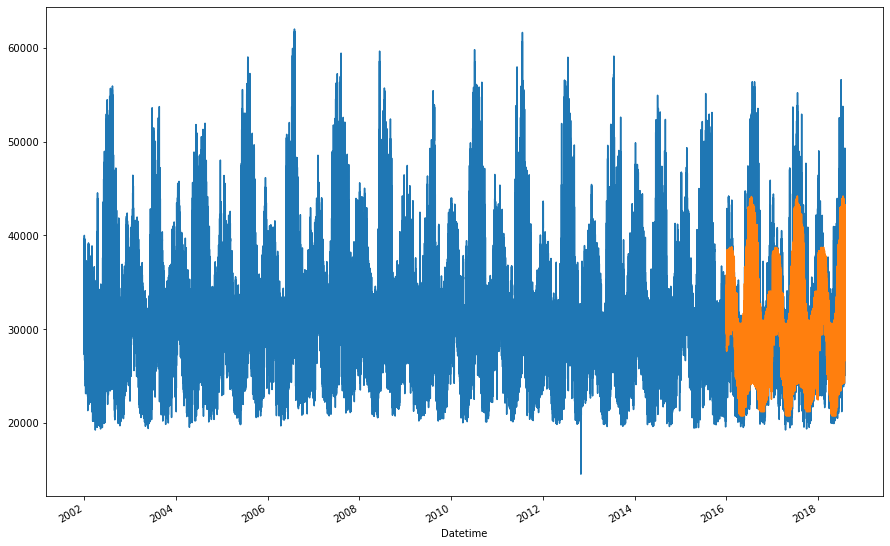

In [208]:
df["PJME_MW"].plot(figsize=(15,10))
df["Prediction"].plot(figsize=(15,10))

Text(0.5, 1.0, 'Actual V/s Predicted in 1 Week Time Frame')

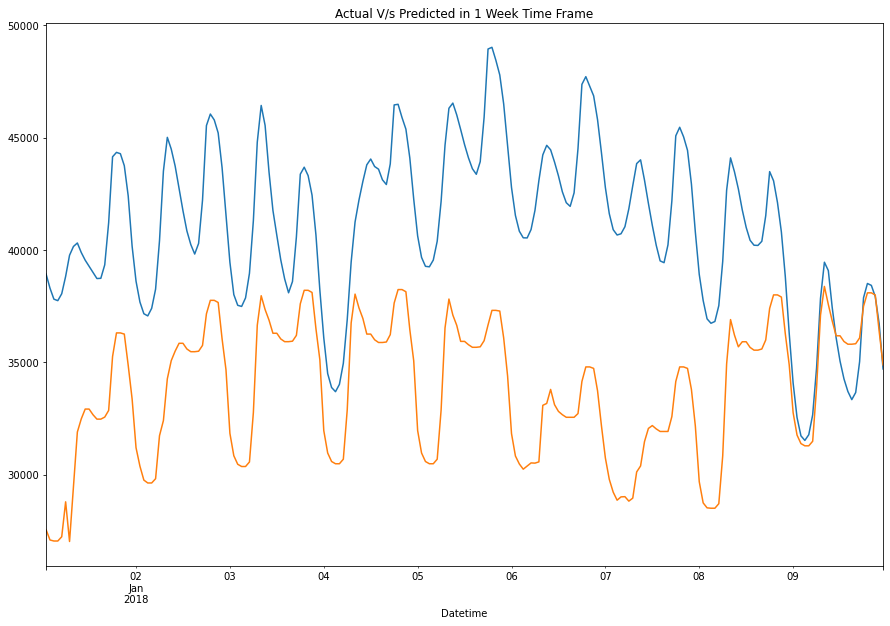

In [210]:
plt.figure(figsize=(15,10))
df.iloc[(df.index > " 01-01-2018") & (df.index < '01-10-2018')]["PJME_MW"].plot()
df.iloc[(df.index > " 01-01-2018") & (df.index < '01-10-2018')]["Prediction"].plot()
plt.title("Actual V/s Predicted in 1 Week Time Frame")

In [217]:
score=np.sqrt(mean_squared_error(test["PJME_MW"],test['Prediction']))
print(f"RMSE Score is {score}")

RMSE Score is 3885.9637527552827


In [220]:
test["error"]=np.abs(test['PJME_MW']-test["Prediction"])

C:\Users\skidrow_pc\AppData\Local\Temp\ipykernel_3228\2650933002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["error"]=np.abs(test['PJME_MW']-test["Prediction"])


In [222]:
test.groupby('year').error.mean()

year
2016    2761.940852
2017    3010.687883
2018    2892.936339
Name: error, dtype: float64